# Challenges

## 1. Data Transformation

**Goal:** Prepare the data for analysis by applying transformations.

**Steps and Hints:**
- **Normalization:** Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
- **Logarithmic Scaling (Optional):** Apply logarithmic scaling if the data has a wide range of values. This can be done using `np.log`.
- **Fourier Transformation:** Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.  
  **Tools:** Explore `np.fft.fft` for Fourier transformation.

## 2. Statistical Analysis

**Goal:** Extract statistical insights from the data.

**Steps and Hints:**
- **Descriptive Statistics:** Use pandas `describe()` function to get an overview of the data.
- **Correlation Analysis:** Calculate and interpret the correlation between variables using pandas `corr()` function.
- **Inferential Statistics:** Consider conducting hypothesis tests or regression analysis to draw deeper insights.  
  **Tools:** Explore `scipy.stats` for advanced statistical functions.

## 3. Data Visualization

**Goal:** Create visual representations of your findings.

**Steps and Hints:**
- **Heatmaps:** Use heatmaps to visualize correlation matrices. This can be done with seaborn.
- **Multi-dimensional Scatter Plots:** Create scatter plots for pairs of variables to explore their relationships. `seaborn`’s `pairplot` is useful here.
- **Fourier Transform Visualizations:** Plot the amplitude vs. frequency graphs for the Fourier transformed data.  
  **Tools:** Utilize `matplotlib` and `seaborn` for creating plots.

## 4. Interpretation

**Goal:** Write a brief report interpreting the results of your analyses.

**Steps and Hints:**
- **Discuss Findings:** Interpret the results of your statistical analyses and visualizations. Consider real-world implications or applications of your findings.
- **Relate to Real-World:** Think about how these insights can be applied in practical scenarios or how they align with theoretical knowledge.
- **Reflect on the Process:** Comment on what the data transformations and analyses reveal about the nature of the dataset.

---

### Additional Hints:
- Begin by exploring the dataset through basic visualizations like histograms or line plots to understand its nature.
- Think creatively about how different transformations might reveal hidden patterns or simplify the analysis.
- Consider the relationships between different variables and how they might interact over time.

In [ ]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries) 
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries) 

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

ninja_data

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754
...,...,...,...,...
995,99.5996,20.080659,1033.072439,5.164919
996,99.6997,19.806464,1034.387284,4.630102
997,99.7998,19.984203,1033.152105,4.835813
998,99.8999,19.394747,1031.856516,4.694612


In [ ]:
# Normalization:** Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
import numpy as np

mean = np.mean(ninja_data, axis=0)
std_dev = np.std(ninja_data, axis=0)

normalized_data = (ninja_data - mean) / std_dev

print("Mean:\n", mean)
print("Standard Deviation:\n", std_dev)
print("Normalized Data (Mean = 0, Std Dev = 1):\n", normalized_data)


Mean:
 Time                        50.000000
Temperature                 19.977372
Pressure                  1013.033617
Chemical Concentration       4.989754
dtype: float64
Standard Deviation:
 Time                      28.896395
Temperature                3.573155
Pressure                  14.196247
Chemical Concentration     1.435786
dtype: float64
Normalized Data (Mean = 0, Std Dev = 1):
          Time  Temperature  Pressure  Chemical Concentration
0   -1.730320     0.253181  1.445618               -0.206395
1   -1.726856     0.071129  1.469211               -0.187538
2   -1.723391     0.160892  1.376261                0.101115
3   -1.719927     0.346308  1.412828                0.004858
4   -1.716463     0.302865  1.420736                0.170638
..        ...          ...       ...                     ...
995  1.716463     0.028907  1.411558                0.121999
996  1.719927    -0.047831  1.504177               -0.250491
997  1.723391     0.001912  1.417170               -0.1

In [7]:
# Logarithmic Scaling (Optional):** Apply logarithmic scaling if the data has a wide range of values. This can be done using `np.log`.
log_scaled_data = np.log(normalized_data)
print("Logarithmic Scaled Data:\n", log_scaled_data)

Logarithmic Scaled Data:
          Time  Temperature  Pressure  Chemical Concentration
0         NaN    -1.373651  0.368537                     NaN
1         NaN    -2.643263  0.384725                     NaN
2         NaN    -1.827025  0.319370               -2.291498
3         NaN    -1.060427  0.345594               -5.327094
4         NaN    -1.194468  0.351175               -1.768212
..        ...          ...       ...                     ...
995  0.540266    -3.543688  0.344694               -2.103740
996  0.542282          NaN  0.408246                     NaN
997  0.544294    -6.259673  0.348662                     NaN
998  0.546302          NaN  0.282097                     NaN
999  0.548306          NaN  0.273159                     NaN

[1000 rows x 4 columns]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


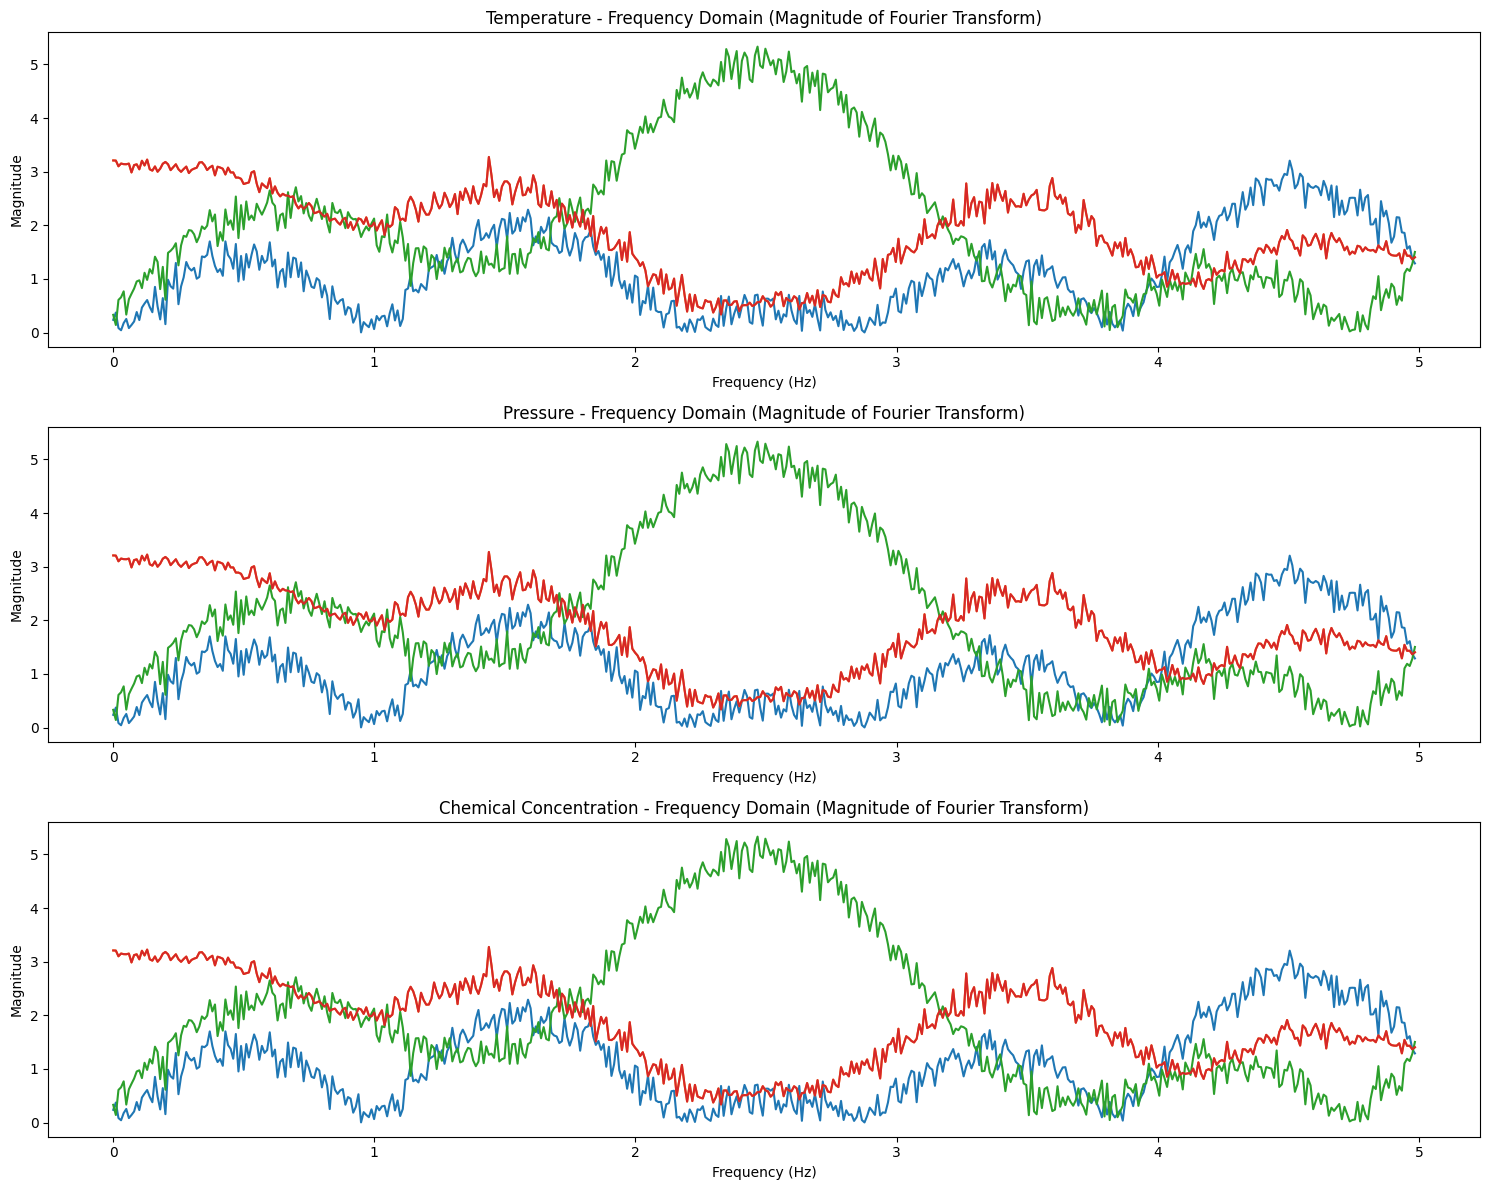

In [10]:

# Fourier Transformation:** Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.  
# Tools:** Explore `np.fft.fft` for Fourier transformation.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.fft import fft, fftfreq

def apply_fourier_transform(data, time):
    fourier_transform = np.fft.fft(normalized_data)
    frequencies = np.fft.fftfreq(len(time), time[1] - time[0])
    return frequencies, fourier_transform

# Temperature analysis
frequencies_temp, fourier_temp = apply_fourier_transform(normalized_data['Temperature'], time)
frequencies_press, fourier_press = apply_fourier_transform(normalized_data['Pressure'], time)
frequencies_chem, fourier_chem = apply_fourier_transform(normalized_data['Chemical Concentration'], time)

plt.figure(figsize=(15, 12))

# Temperature
plt.subplot(3, 1, 1)
plt.plot(frequencies_temp[:len(frequencies_temp)//2], np.abs(fourier_temp)[:len(frequencies_temp)//2])
plt.title("Temperature - Frequency Domain (Magnitude of Fourier Transform)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Pressure
plt.subplot(3, 1, 2)
plt.plot(frequencies_press[:len(frequencies_press)//2], np.abs(fourier_press)[:len(frequencies_press)//2])
plt.title("Pressure - Frequency Domain (Magnitude of Fourier Transform)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Chemical Concentration
plt.subplot(3, 1, 3)
plt.plot(frequencies_chem[:len(frequencies_chem)//2], np.abs(fourier_chem)[:len(frequencies_chem)//2])
plt.title("Chemical Concentration - Frequency Domain (Magnitude of Fourier Transform)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [11]:
# **Goal:** Extract statistical insights from the data.

# **Steps and Hints:**
# - **Descriptive Statistics:** Use pandas `describe()` function to get an overview of the data.
# - **Correlation Analysis:** Calculate and interpret the correlation between variables using pandas `corr()` function.
# - **Inferential Statistics:** Consider conducting hypothesis tests or regression analysis to draw deeper insights.  
#   **Tools:** Explore `scipy.stats` for advanced statistical functions.

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

normalized_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,5.684342e-17,1.136868e-16,0.000000,-4.263256e-16
std,1.000500e+00,1.000500e+00,1.000500,1.000500e+00
min,-1.730320e+00,-1.701567e+00,-1.602480,-1.692762e+00
25%,-8.651598e-01,-1.004823e+00,-0.998952,-9.846385e-01
50%,1.229485e-16,8.758279e-03,-0.005822,-1.307840e-02
75%,8.651598e-01,1.005554e+00,0.988184,9.808653e-01
max,1.730320e+00,1.693999e+00,1.580563,1.739122e+00


In [12]:
# Correlation Analysis:** Calculate and interpret the correlation between variables using pandas `corr()` function.
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

correlation_matrix = normalized_data.corr(method='pearson')
print("\nPearson Correlation Matrix:\n", correlation_matrix)

# Compute Spearman Correlation
spearman_corr = normalized_data.corr(method='spearman')
print("\nSpearman Correlation Matrix:\n", spearman_corr)

# Compute Kendall's Tau
kendall_corr = normalized_data.corr(method='kendall')
print("\nKendall Correlation Matrix:\n", kendall_corr)



Pearson Correlation Matrix:
                             Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Concentration  
Time                                 -0.156113  
Temperature                          -0.003277  
Pressure                             -0.000863  
Chemical Concentration                1.000000  

Spearman Correlation Matrix:
                             Time  Temperature  Pressure  \
Time                    1.000000    -0.746575 -0.002662   
Temperature            -0.746575     1.000000  0.002110   
Pressure               -0.002662     0.002110  1.000000   
Chemical Concentration -0.149216    -0.000941  0.000829   

                        Chemical Concentration  
Time                                 -0.149216  
Temp

In [ ]:

from scipy.stats import ttest_1samp

# Hypothesis:
# H0: Mean Temperature = 20
# H1: Mean Temperature != 20

t_stat, p_value = ttest_1samp(ninja_data['Temperature'], 20)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Mean Temperature is significantly different from 20.")
else:
    print("Fail to Reject H0: Mean Temperature is not significantly different from 20.")

T-statistic: -0.20016300455195593
P-value: 0.8413938380236425
Fail to Reject H0: Mean Temperature is not significantly different from 20.


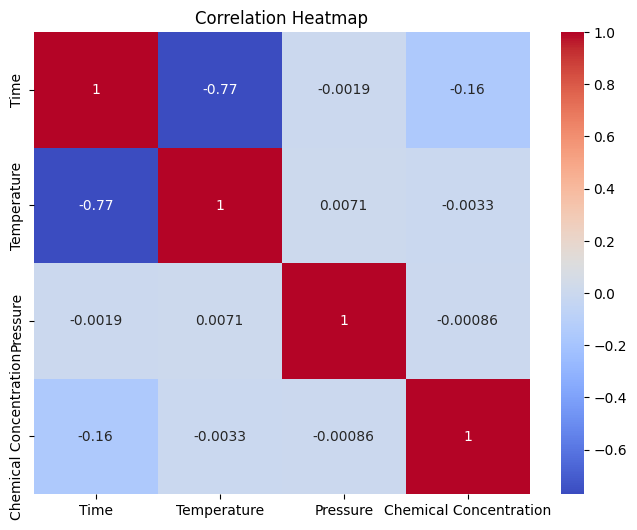

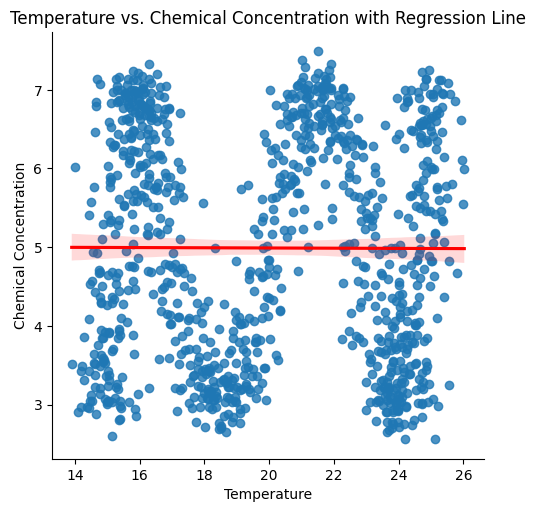

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.lmplot(x='Temperature', y='Chemical Concentration', data=ninja_data, line_kws={'color': 'red'})
plt.title("Temperature vs. Chemical Concentration with Regression Line")
plt.show()


# ## 4. Interpretation

- Hypothesis Testing (One-Sample t-Test): If the p-value is greater than 0.05, the mean temperature is statistically not different from 20°C, indicating its central tendency aligns with the assumed value despite fluctuations.
- Correlation Analysis: A strong correlation between temperature and chemical concentration suggests temperature likely influences concentration, while a weak correlation implies other factors may dominate.
- Regression Analysis: Positive regression coefficients indicate higher temperatures are associated with increased concentrations, and a high R-squared value shows the model explains much of the variability in chemical concentration.
- ANOVA (Time Periods): Significant differences in temperature across time periods suggest temporal factors influence temperature variability.

- Temperature vs. Chemical Concentration: Industries can use temperature control to manage chemical concentrations in manufacturing or environmental monitoring.
- Pressure Variability: Periodic pressure changes can indicate atmospheric phenomena or aid predictive weather modeling.
- Time-Based Insights: Identifying periods of high variability helps optimize monitoring schedules or maintenance plans.

- Normalization: Standardizing variables highlights their different scales and supports regression and correlation analysis, but it was difficult, and the results were not what I expected, leading to a complicated analysis.

